In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Loading data")
print("x_train.shape: ", x_train.shape)

Loading data
x_train.shape:  (60000, 28, 28)


In [3]:
#CNN requires 3 dimensions
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)


x_train.shape:  (60000, 28, 28, 1)


In [4]:
# number of classes
K = len(set(y_train))
print("num classes: ", + K)

num classes:  10


In [5]:
%%time
# Input layer
print("Shape: ", x_train[0].shape)
i = Input(shape=x_train[0].shape)

# no. params = kernalSize + bias * numFilters
# conv2d param# 1120 = (3x3 + 1) * 112
x = Conv2D(112, (3, 3), padding='Same', activation=None)(i)
# batch_normalization
x = BatchNormalization()(x)
# activation
x = Activation('relu')(x)

# conv2d_1 param# 64,576 = (3*3*112 + 1) * 64
x = Conv2D(64, (3, 3), padding='Same', activation=None)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# conv2d_2 params# 73,856 = (4*4*64 + 1) * 128
x = Conv2D(128, (3, 3), padding='Same', activation=None)(x)
x = BatchNormalization()(x)
#activation_2 (outputSize: 28,28,128)
x = Activation('relu')(x)

# max_pooling2d (outputSize: 14,14,128)
x = MaxPooling2D((2, 2))(x)

# flatten (outputsize: 14*14*128 = 25,088)
x = Flatten()(x)

# dense (params: (inputSize + bias) * units = (25,088 + 1) * 208 = 5,218,512)
x = Dense(208, activation='relu')(x)
#dropout
x = Dropout(0.2)(x)
#dense_1
x = Dense(160, activation='relu')(x)
#dropout_1
x = Dropout(0.2)(x)
#dense_2
x = Dense(128, activation='relu')(x)
#dropout_2
x = Dropout(0.2)(x)
# dense_3
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Shape:  (28, 28, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 112)       1120      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 112)      448       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        64576     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                         

In [6]:
%%time
# compile and fit
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

2023-12-04 22:47:17.768449: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 143s 76ms/step - loss: 0.6415 - accuracy: 0.7810 - val_loss: 0.3832 - val_accuracy: 0.8605
CPU times: user 17min 1s, sys: 1min 44s, total: 18min 45s
Wall time: 2min 22s


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


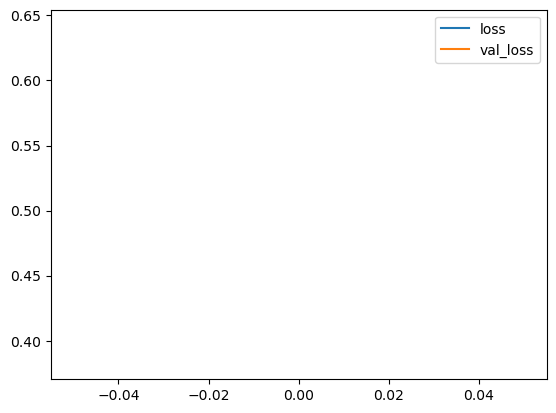

CPU times: user 137 ms, sys: 3.69 ms, total: 141 ms
Wall time: 59.6 ms


In [7]:
%%time
print(r.history.keys())

# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

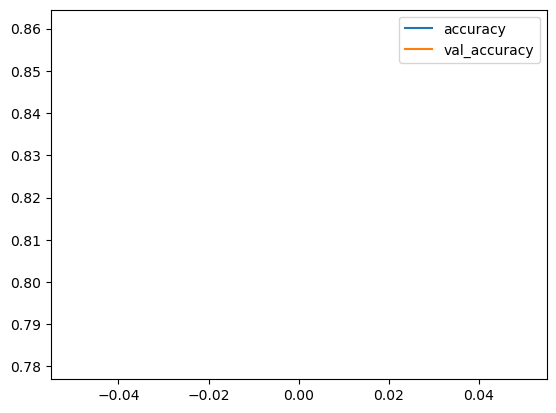

CPU times: user 204 ms, sys: 7.65 ms, total: 211 ms
Wall time: 86.6 ms


In [10]:
%%time
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()